# Government Interoperability Zone Alignment

In [22]:
install.packages('seqinr', repos='http://cran.us.r-project.org')

also installing the dependencies 'ade4', 'segmented'



package 'ade4' successfully unpacked and MD5 sums checked
package 'segmented' successfully unpacked and MD5 sums checked
package 'seqinr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\mans\AppData\Local\Temp\RtmpGgYT2w\downloaded_packages


In [17]:
generateRandomZoneSeqsWithMultinomialModel <- function(initialCase, N)
{
    require("seqinr") 
    
    inputChars <- s2c(initialCase)
    
    the.length <- length(inputChars)
    the.table <- table(inputChars)
    
    letters <- rownames(the.table)
    numletters <- length(letters)
    probabilities <- numeric() 
    
    for (i in 1:numletters) probabilities[i] <- the.table[[i]] / the.length
    
    zone.seqs <- numeric(N)
    
    for (j in 1:N)
        zone.seqs[j] <- c2s(sample(letters, the.length, rep=TRUE, prob=probabilities))
    
    return(zone.seqs)
}


population.size<-1000

random.zone.seqs <- generateRandomZoneSeqsWithMultinomialModel('0123',population.size)
random.zone.seqs[1:10]


[1] "2102" "3210" "3333" "3302" "1221" "2221" "0333" "1211" "3133" "2333"

In [18]:
standard_str <- "0003"
standard <- as.numeric(s2c(standard_str))
standard

[1] 0 0 0 3

In [19]:
align<- function(standard, case.str, summing=FALSE){
    cas<-as.numeric(s2c(case.str))
    numletters <- length(cas)
    diffs <- numeric()
    
    for (i in 1:numletters)
    {
        letter <- cas[i]
        count <- standard[i]

        diffs[i] <- abs(count-letter)
    }
    
    if(summing)
        res<- sum(diffs)
    else 
        res<- sum(diffs !=0)
    return (res)
}



In [13]:
align(standard, '0123', TRUE)

[1] 3

In [58]:
align(standard, '0123')

[1] 2

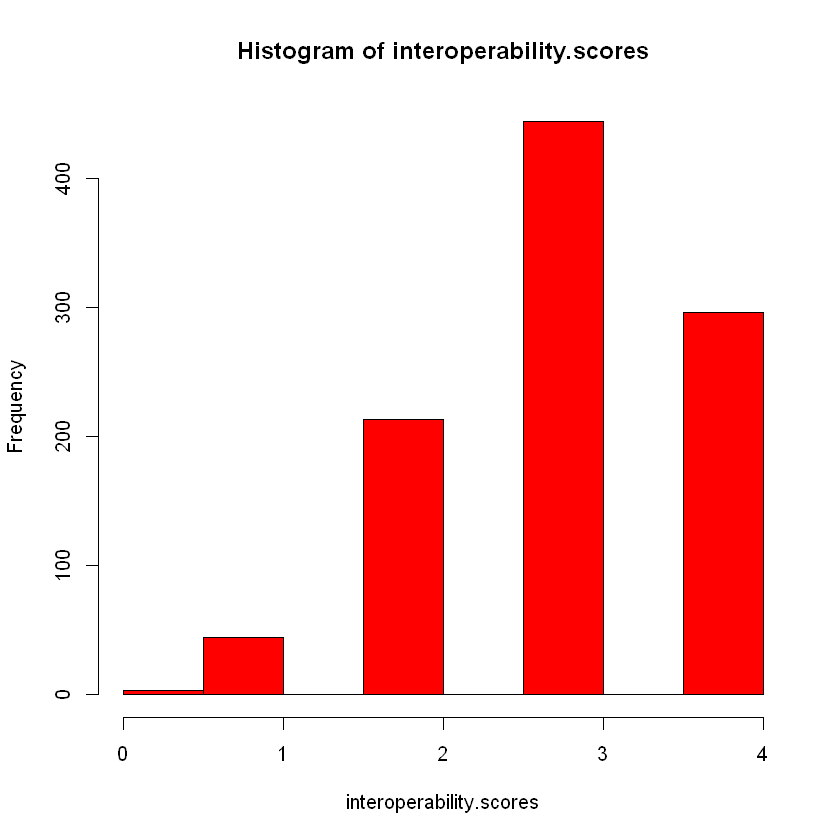

In [20]:
interoperability.scores <- double(population.size) 

for (i in 1:population.size)
    interoperability.scores[i] <- align(standard, random.zone.seqs[i])

hist(interoperability.scores, col="red")

In [21]:
sum(interoperability.scores <= 2)

[1] 260

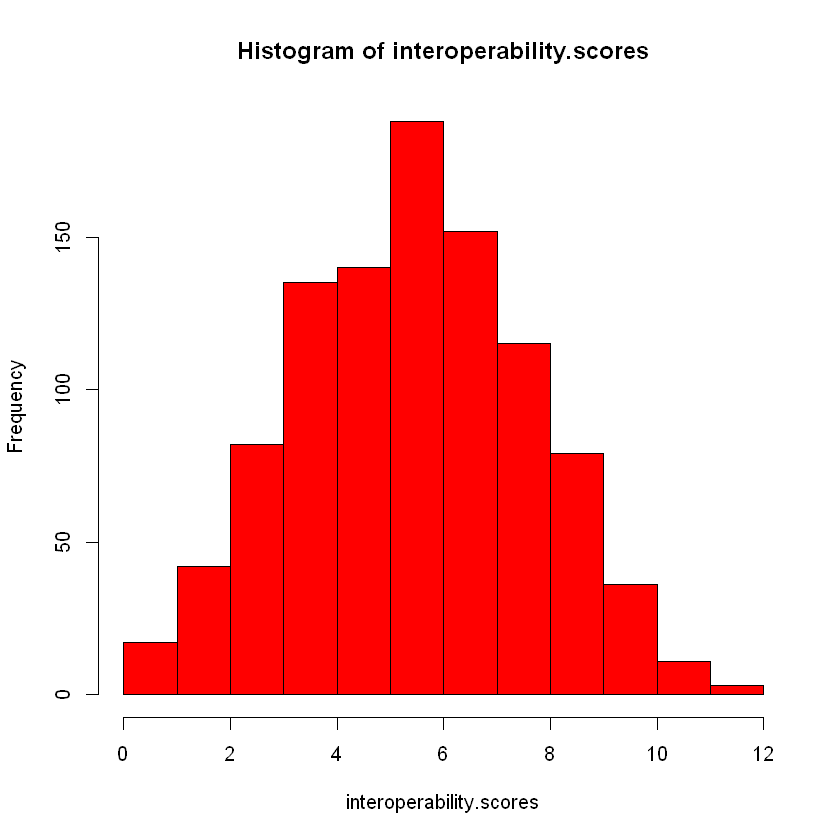

In [22]:
interoperability.scores <- double(population.size) 

for (i in 1:population.size)
    interoperability.scores[i] <- align(standard, random.zone.seqs[i], TRUE)

hist(interoperability.scores, col="red")

In [65]:
sum(interoperability.scores <= 3)

[1] 117

# using R to generate case-train using a particular multinomial model

In [23]:
operatioal.scenarios <- s2c("0123") 

multinomial.sample<- as.numeric(sample(operatioal.scenarios, population.size, rep=TRUE, prob=c(1/4, 1/4, 1/4, 1/4) ))
multinomial.sample

[1] 0 2 0 0 0 0 0 1 1 0 0 1 3 1 1 1 1 2 3 2 3 3 3 0 2 2 1 0 1 2 1 0 2 1 2 2 0
  [38] 3 1 0 2 2 2 2 1 2 3 2 0 1 1 3 0 3 0 0 3 1 0 0 0 0 3 3 2 0 2 2 2 0 3 1 3 2
  [75] 2 3 0 0 2 2 2 0 1 1 3 3 2 1 1 0 3 0 3 3 2 1 1 1 1 2 1 2 0 1 3 1 2 2 2 0 3
 [112] 0 0 1 2 2 2 2 0 0 2 0 0 2 0 1 2 3 2 0 1 1 3 2 3 1 2 1 1 3 2 0 3 2 0 3 2 3
 [149] 1 0 3 0 0 0 1 2 3 2 2 0 2 3 0 0 3 3 0 3 1 3 0 1 0 0 0 1 3 0 2 2 3 1 1 3 3
 [186] 2 1 1 0 0 3 3 1 2 0 0 2 0 0 1 1 3 1 2 1 0 0 2 3 3 3 0 3 3 2 1 1 3 1 3 1 1
 [223] 1 2 2 0 0 2 2 2 3 3 2 1 1 3 1 2 2 0 0 0 3 1 3 1 3 0 3 1 0 3 3 1 3 2 0 1 3
 [260] 0 3 3 2 1 1 0 2 1 0 3 2 0 3 2 1 1 3 1 1 1 1 1 2 0 0 0 1 2 1 3 0 3 0 0 3 0
 [297] 2 0 1 2 2 3 1 0 0 3 0 2 2 1 0 3 3 2 1 0 1 1 2 3 2 1 2 1 2 0 0 3 0 2 0 3 0
 [334] 3 3 2 3 3 2 1 3 2 2 0 1 0 2 2 2 1 0 1 3 3 2 2 3 2 0 1 3 0 3 3 3 3 2 2 2 1
 [371] 2 1 3 2 3 2 2 3 2 1 2 1 2 0 2 3 3 0 2 2 1 1 2 2 1 0 3 3 3 1 3 2 2 2 3 1 3
 [408] 1 0 0 3 1 2 0 1 3 0 0 2 3 2 2 0 2 1 0 2 2 2 0 3 1 2 1 3 0 3 0 2 0 3 1 1 0
 [445] 1 3 1 0 3 0 0 0 2 1 1 3 3 3 2 1 0 2 3 2 1 2 0 2 0 3 3 0 3 2 3 1 0 2 1 0 1
 [482] 2 3 0 1 0 3 0 2 3 0 1 0 3 1 1 0 3 0 3 3 0 1 1 2 3 1 1 1 2 2 3 1 0 2 0 0 1
 [519] 3 1 2 1 3 2 2 0 1 0 0 1 2 2 0 1 1 2 0 3 2 2 0 0 0 1 2 1 2 2 1 2 2 1 3 1 2
 [556] 2 3 3 1 3 2 0 0 0 0 2 2 3 2 2 1 1 0 1 2 0 0 1 3 3 3 0 2 3 1 1 2 2 3 2 0 0
 [593] 0 3 1 2 2 2 3 1 3 2 3 3 0 0 3 0 1 0 0 0 1 1 1 1 3 0 1 2 1 2 0 2 3 1 0 2 0
 [630] 2 0 3 0 2 1 1 0 0 0 1 0 3 1 2 2 2 0 2 3 2 3 3 2 2 3 2 1 2 1 2 1 2 2 0 3 2
 [667] 2 1 2 1 3 3 2 1 1 3 2 2 2 3 2 1 2 2 3 3 2 0 2 2 2 1 0 2 2 1 2 1 1 1 2 1 0
 [704] 2 1 2 3 0 0 1 0 0 0 1 2 3 2 3 1 2 2 2 0 2 3 0 0 2 2 1 0 2 1 2 0 0 1 3 2 1
 [741] 3 0 1 3 2 2 0 2 3 2 3 1 2 2 2 2 0 2 3 1 1 3 0 0 3 3 1 3 3 0 0 1 0 0 0 0 2
 [778] 0 0 0 1 1 3 3 2 0 2 2 0 1 3 2 0 0 3 2 0 0 2 2 0 0 2 3 3 0 1 3 1 3 0 0 0 1
 [815] 0 3 1 3 2 1 2 1 0 0 1 1 0 1 3 0 0 3 2 3 0 0 1 3 2 0 3 1 2 3 3 2 3 2 1 3 2
 [852] 3 1 0 0 2 2 2 0 0 0 0 1 3 3 1 2 3 3 1 1 1 0 3 0 2 0 3 0 1 0 2 2 1 1 3 2 1
 [889] 1 1 0 2 3 3 1 1 3 2 2 2 1 0 2 0 2 1 3 3 0 0 1 3 0 3 1 0 1 1 1 2 3 2 1 0 2
 [926] 1 2 1 2 0 2 2 1 1 3 1 3 2 2 3 0 2 1 3 0 3 0 0 3 1 1 1 0 2 3 3 0 1 1 0 3 3
 [963] 1 3 1 0 0 0 1 1 3 0 0 2 0 0 2 2 0 1 2 0 1 1 0 3 0 0 3 0 3 3 3 0 0 3 3 0 1
[1000] 1

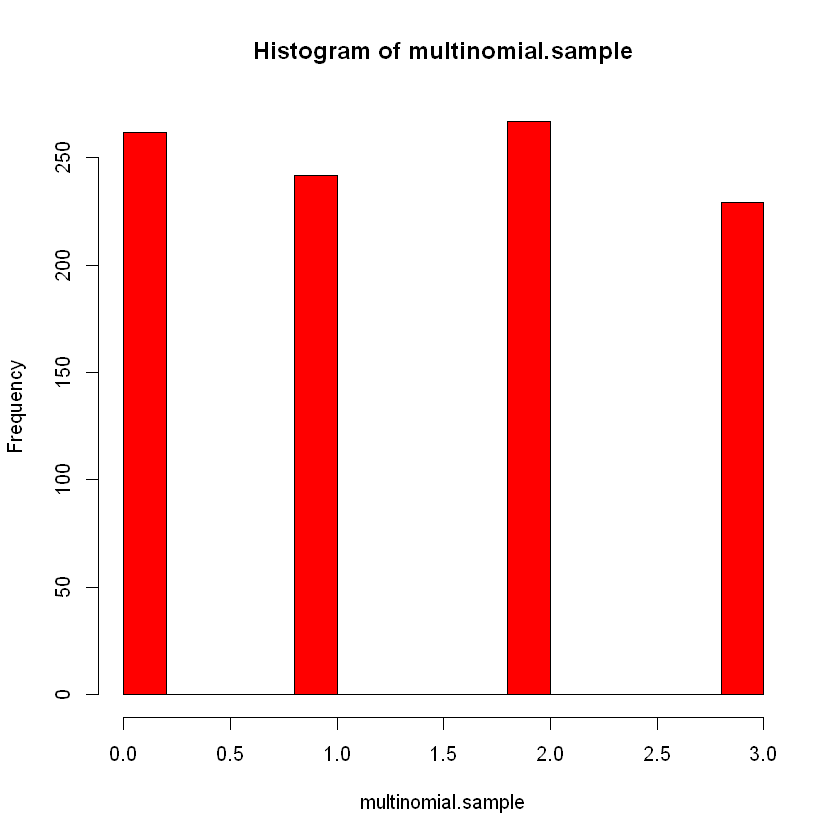

In [25]:
hist(multinomial.sample, col="red")

In [26]:
as.numeric(sample(operatioal.scenarios, population.size, rep=TRUE, prob=c(0.1, 0.41, 0.39, 0.1)))

[1] 0 0 2 2 2 2 2 1 2 1 1 1 1 2 1 3 3 2 0 1 0 1 0 1 3 1 1 0 0 3 2 2 3 0 1 1 3
  [38] 3 2 1 0 2 1 2 3 2 2 1 0 2 2 2 1 1 2 2 2 1 0 0 2 1 3 1 1 2 1 1 2 1 0 2 1 2
  [75] 2 2 1 3 2 1 1 2 2 2 1 0 2 1 1 2 2 2 0 1 0 2 2 1 1 2 1 2 2 1 2 2 1 1 2 1 2
 [112] 2 2 0 2 1 1 2 0 0 1 2 1 2 2 1 1 2 0 1 2 2 2 2 2 2 1 1 1 2 1 1 2 1 2 2 2 3
 [149] 2 2 1 2 1 2 1 2 2 1 0 0 1 2 2 1 2 1 2 1 2 2 1 3 0 1 1 1 0 3 3 2 1 0 1 2 1
 [186] 1 1 1 2 2 2 2 1 1 3 2 0 1 1 2 2 1 1 2 1 1 2 2 3 2 3 1 2 1 2 1 1 2 2 1 1 3
 [223] 1 2 1 1 2 2 2 1 2 1 1 1 2 0 2 1 2 1 1 2 2 1 1 2 2 2 2 2 3 2 0 1 2 1 2 0 1
 [260] 3 1 1 1 1 2 0 2 1 1 3 2 2 3 3 1 1 2 1 2 1 1 3 1 3 1 2 2 2 2 3 1 3 1 1 2 2
 [297] 2 2 2 2 3 1 3 1 2 2 2 3 2 0 1 2 0 2 3 1 2 1 1 2 3 3 1 2 1 1 2 1 0 3 2 1 3
 [334] 2 1 1 1 0 1 1 1 2 2 2 1 2 1 2 1 2 2 1 1 2 1 1 2 1 1 1 1 1 1 2 1 1 0 3 1 2
 [371] 2 1 1 3 2 2 2 0 1 2 1 1 1 1 1 2 3 2 1 2 1 1 3 2 0 1 2 2 0 2 1 2 2 1 2 2 0
 [408] 1 2 3 2 3 2 0 2 2 2 1 0 0 2 1 2 1 2 1 3 2 1 1 1 1 2 1 2 3 1 2 2 2 1 2 1 2
 [445] 1 3 0 1 0 2 2 3 1 1 3 2 2 0 1 2 2 1 1 2 2 2 1 1 1 1 0 1 1 2 1 0 1 3 2 1 2
 [482] 2 2 2 2 3 1 3 0 2 1 0 2 1 2 2 2 1 1 2 2 3 1 1 2 2 1 1 1 2 2 3 2 1 1 2 3 2
 [519] 0 2 1 1 0 2 2 3 1 3 2 2 2 3 2 0 2 2 2 1 1 2 1 2 1 2 0 1 3 2 1 1 0 1 1 2 2
 [556] 3 2 1 1 3 2 2 1 1 2 2 1 2 1 2 2 1 2 1 1 3 3 1 2 1 1 1 1 2 2 1 1 1 2 2 3 0
 [593] 1 2 2 1 1 1 2 0 2 3 1 1 2 1 1 1 1 2 2 3 1 0 1 1 1 3 1 1 1 2 1 2 3 2 1 2 1
 [630] 1 0 1 1 3 2 2 1 1 1 2 1 2 3 1 2 1 1 3 1 2 0 0 1 2 2 1 0 0 2 2 2 2 1 2 1 1
 [667] 1 1 2 2 1 1 1 2 2 1 2 2 2 1 0 1 1 2 0 3 2 1 2 0 2 1 1 1 2 1 2 2 2 1 2 1 1
 [704] 1 1 3 0 2 0 1 2 2 2 1 3 2 0 2 2 2 0 2 1 0 2 1 2 0 0 2 1 1 2 2 2 1 2 0 3 1
 [741] 1 2 2 2 2 1 1 1 2 3 0 2 1 1 1 0 2 1 0 2 2 0 1 3 2 2 1 1 1 1 2 2 3 2 3 2 1
 [778] 1 1 3 2 2 2 1 2 2 1 1 2 3 1 2 2 2 1 2 0 3 3 3 2 2 2 1 1 1 2 2 1 0 2 2 1 1
 [815] 2 1 1 2 1 1 1 0 2 1 1 2 1 2 3 2 2 0 2 1 1 2 1 2 1 0 0 2 3 2 1 3 1 2 0 2 1
 [852] 1 0 2 2 2 0 1 2 2 2 0 1 0 0 3 2 2 2 0 2 2 2 1 1 1 2 2 2 2 1 1 2 1 1 0 1 1
 [889] 0 1 3 2 3 1 2 1 1 0 2 1 2 2 1 2 1 2 1 1 2 2 0 1 1 1 2 2 2 2 1 1 1 2 3 1 2
 [926] 1 2 2 1 1 2 3 1 1 0 0 0 2 1 1 2 1 2 2 2 3 2 2 0 1 2 2 1 2 2 1 2 2 2 1 3 1
 [963] 3 2 2 1 2 1 2 3 3 2 2 1 1 2 1 2 1 2 1 1 2 2 2 2 2 1 1 3 0 1 3 2 1 1 2 2 2
[1000] 2

# The transition matrix for a Markov model

In [27]:
post.0.probs <- c(0.2, 0.2, 0.3, 0.3)
post.1.probs <- c(0.1, 0.4, 0.4, 0.1)
post.2.probs <- c(0.25, 0.25, 0.25, 0.25) 
post.3.probs <- c(0.5, 0.17, 0.17, 0.17) 
transition.matrix <- matrix(c(post.0.probs, post.1.probs, post.2.probs, post.3.probs), 4, 4, byrow = TRUE) 

rownames(transition.matrix) <- operatioal.scenarios
colnames(transition.matrix) <- operatioal.scenarios


transition.matrix

,0,1,2,3
0,0.20,0.20,0.30,0.30
1,0.10,0.40,0.40,0.10
2,0.25,0.25,0.25,0.25
3,0.50,0.17,0.17,0.17


# Generating a case-train using a Markov model

In [33]:
generate.markov.zone.seq <- function(operatioal.scenarios, transition.matrix, initial.probs, N)
{
    zone.sequence <- character() 
    
    zone.sequence[1] <- sample(operatioal.scenarios, 1, rep=TRUE, prob=initial.probs)
    
    for (i in 2:N)
        zone.sequence[i] <-sample(operatioal.scenarios, 1, rep=TRUE, prob=transition.matrix[zone.sequence[i-1],])
    
    return(zone.sequence)
}

In [36]:
markov.sample<- as.numeric(generate.markov.zone.seq(operatioal.scenarios, transition.matrix, c(0.25, 0.25, 0.25, 0.25), population.size))
markov.sample

[1] 3 0 2 0 0 3 1 2 1 2 3 0 2 1 2 3 0 1 2 3 0 0 2 0 1 0 0 3 1 2 1 2 3 0 0 3 0
  [38] 2 3 0 2 1 1 1 2 3 1 1 3 0 3 3 0 1 3 0 2 0 0 3 0 1 0 0 0 1 0 2 2 3 0 2 2 0
  [75] 2 1 2 2 3 2 2 3 0 2 3 0 1 3 1 1 2 0 3 2 0 0 0 2 3 1 3 0 1 2 1 1 1 3 0 3 0
 [112] 3 0 1 2 2 0 3 2 0 1 1 1 1 2 2 3 0 1 1 2 0 0 3 0 2 0 1 1 2 1 1 2 3 0 2 1 2
 [149] 2 0 2 2 3 0 1 1 1 1 2 3 0 2 2 0 2 2 1 2 1 2 3 2 2 1 2 2 1 1 3 3 2 3 1 2 1
 [186] 2 0 2 0 2 2 3 0 2 3 0 0 3 3 0 3 0 1 2 2 1 2 0 3 3 1 0 2 3 0 2 2 1 2 3 0 2
 [223] 0 2 2 1 3 0 0 3 2 3 0 3 1 1 1 0 0 2 3 0 3 3 0 3 2 0 3 0 2 1 2 2 2 1 1 2 1
 [260] 2 0 2 2 3 1 3 0 2 0 3 0 0 2 2 2 1 1 2 0 3 2 1 2 2 0 3 1 2 2 3 1 2 2 2 2 1
 [297] 2 0 1 1 1 2 3 2 0 1 2 0 1 2 1 1 2 1 1 1 1 2 2 0 2 1 3 0 3 1 0 3 0 3 3 0 2
 [334] 1 3 1 2 1 1 1 2 1 2 1 2 2 3 1 2 3 0 2 0 1 2 3 1 1 2 3 0 0 3 3 2 0 3 1 1 2
 [371] 2 1 2 0 3 3 0 2 0 1 1 2 1 1 3 0 0 2 2 2 3 0 2 0 1 3 1 2 0 1 0 1 1 1 3 0 3
 [408] 1 2 3 2 3 0 2 3 0 0 0 2 2 1 2 3 0 0 3 2 2 0 2 0 1 1 1 2 2 3 0 3 0 3 2 1 2
 [445] 1 2 1 2 0 2 2 0 1 2 2 2 0 2 1 0 3 0 1 3 0 1 2 0 2 3 3 0 2 1 2 1 2 3 2 2 2
 [482] 1 1 1 2 0 1 2 1 2 3 0 2 0 3 0 2 2 3 2 2 0 1 2 3 0 2 2 2 2 1 3 3 0 3 2 2 3
 [519] 1 0 2 1 3 3 1 2 0 0 1 1 2 3 0 1 0 2 2 1 2 2 2 0 3 0 2 2 2 3 0 0 2 0 2 0 2
 [556] 2 2 0 2 2 2 0 1 2 2 3 0 0 2 3 0 3 3 3 3 0 3 0 2 3 0 1 3 3 3 1 1 1 1 1 2 1
 [593] 1 2 0 1 1 3 2 2 2 3 0 0 3 0 2 2 1 2 3 1 1 2 3 3 0 3 0 0 1 2 0 0 2 1 1 2 2
 [630] 3 0 1 2 1 2 3 2 0 1 1 0 1 2 1 0 1 1 1 2 0 3 2 0 2 0 0 0 1 2 3 0 2 0 0 2 0
 [667] 3 0 0 1 1 1 2 3 0 3 1 0 0 2 2 1 1 2 3 1 2 0 3 0 0 2 2 1 1 1 2 0 1 3 0 3 0
 [704] 0 3 0 2 2 1 1 1 2 0 3 2 0 1 1 2 2 0 0 1 0 3 0 2 3 0 3 0 1 0 3 0 0 0 0 0 3
 [741] 3 0 2 3 0 2 3 2 0 0 3 2 2 1 3 1 2 3 0 1 2 2 2 0 2 3 0 3 3 3 0 3 1 3 2 1 2
 [778] 2 0 3 0 2 0 2 0 2 0 2 1 2 2 3 0 1 2 0 2 0 1 2 1 3 0 3 3 0 2 1 2 2 2 2 2 2
 [815] 2 1 2 0 3 0 2 3 0 3 2 1 1 2 0 1 1 2 3 2 1 1 0 1 1 2 1 1 2 0 2 1 1 2 2 3 0
 [852] 3 1 1 3 2 2 0 0 2 1 0 2 2 1 2 2 3 0 0 2 0 3 0 0 3 0 2 1 2 1 1 1 2 0 2 0 3
 [889] 2 2 0 2 3 0 0 0 0 2 3 2 0 0 3 1 3 1 1 3 0 3 1 2 2 0 0 0 1 2 0 1 1 1 1 1 3
 [926] 0 0 0 1 1 2 3 1 2 3 0 0 0 2 0 0 2 3 0 1 1 1 1 1 2 0 3 2 0 3 0 3 0 2 3 3 2
 [963] 3 1 2 2 3 0 0 2 1 2 0 3 0 1 1 0 2 3 0 2 0 3 0 3 0 1 0 3 2 2 0 3 0 3 0 1 1
[1000] 1

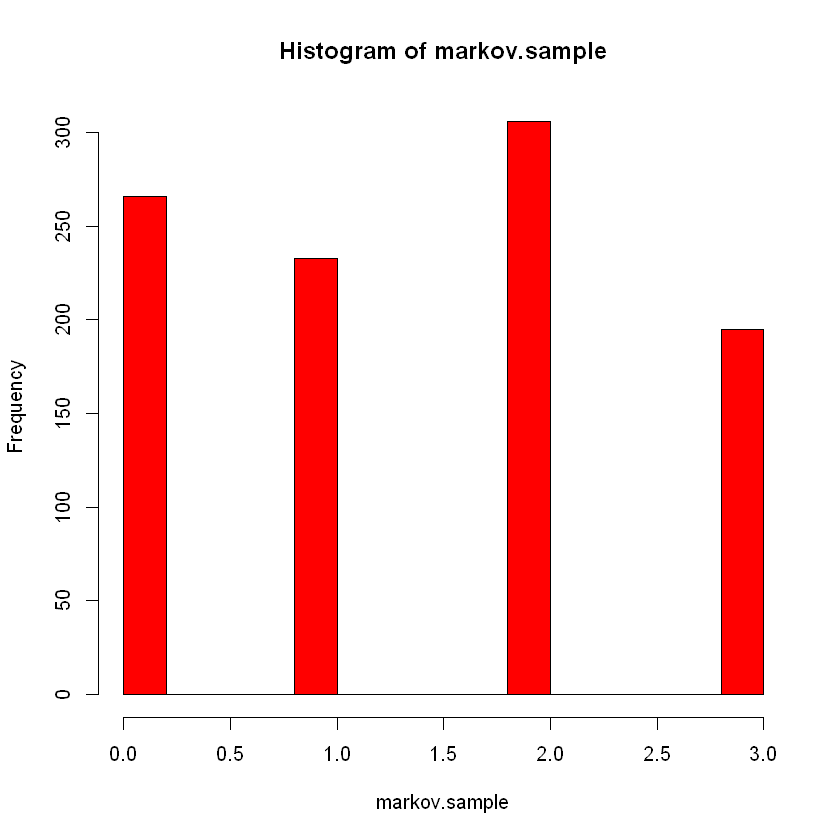

In [37]:
hist(markov.sample, col="red")